# Probability & Statistics    (Ahmed Sharaf)


## Titanic Data Analysis
[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 
##### Features:
- survival - Survival (0 = No; 1 = Yes)
- pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Import numpy, pandas and visualization libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline

### Read the Titanic.csv file into Pandas dataframe

In [2]:
df = pd.read_csv("data/Titanic.csv")

### Display the info of the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Display the descriptive statistics of the dataframe

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Perform pairplot of the dataframe

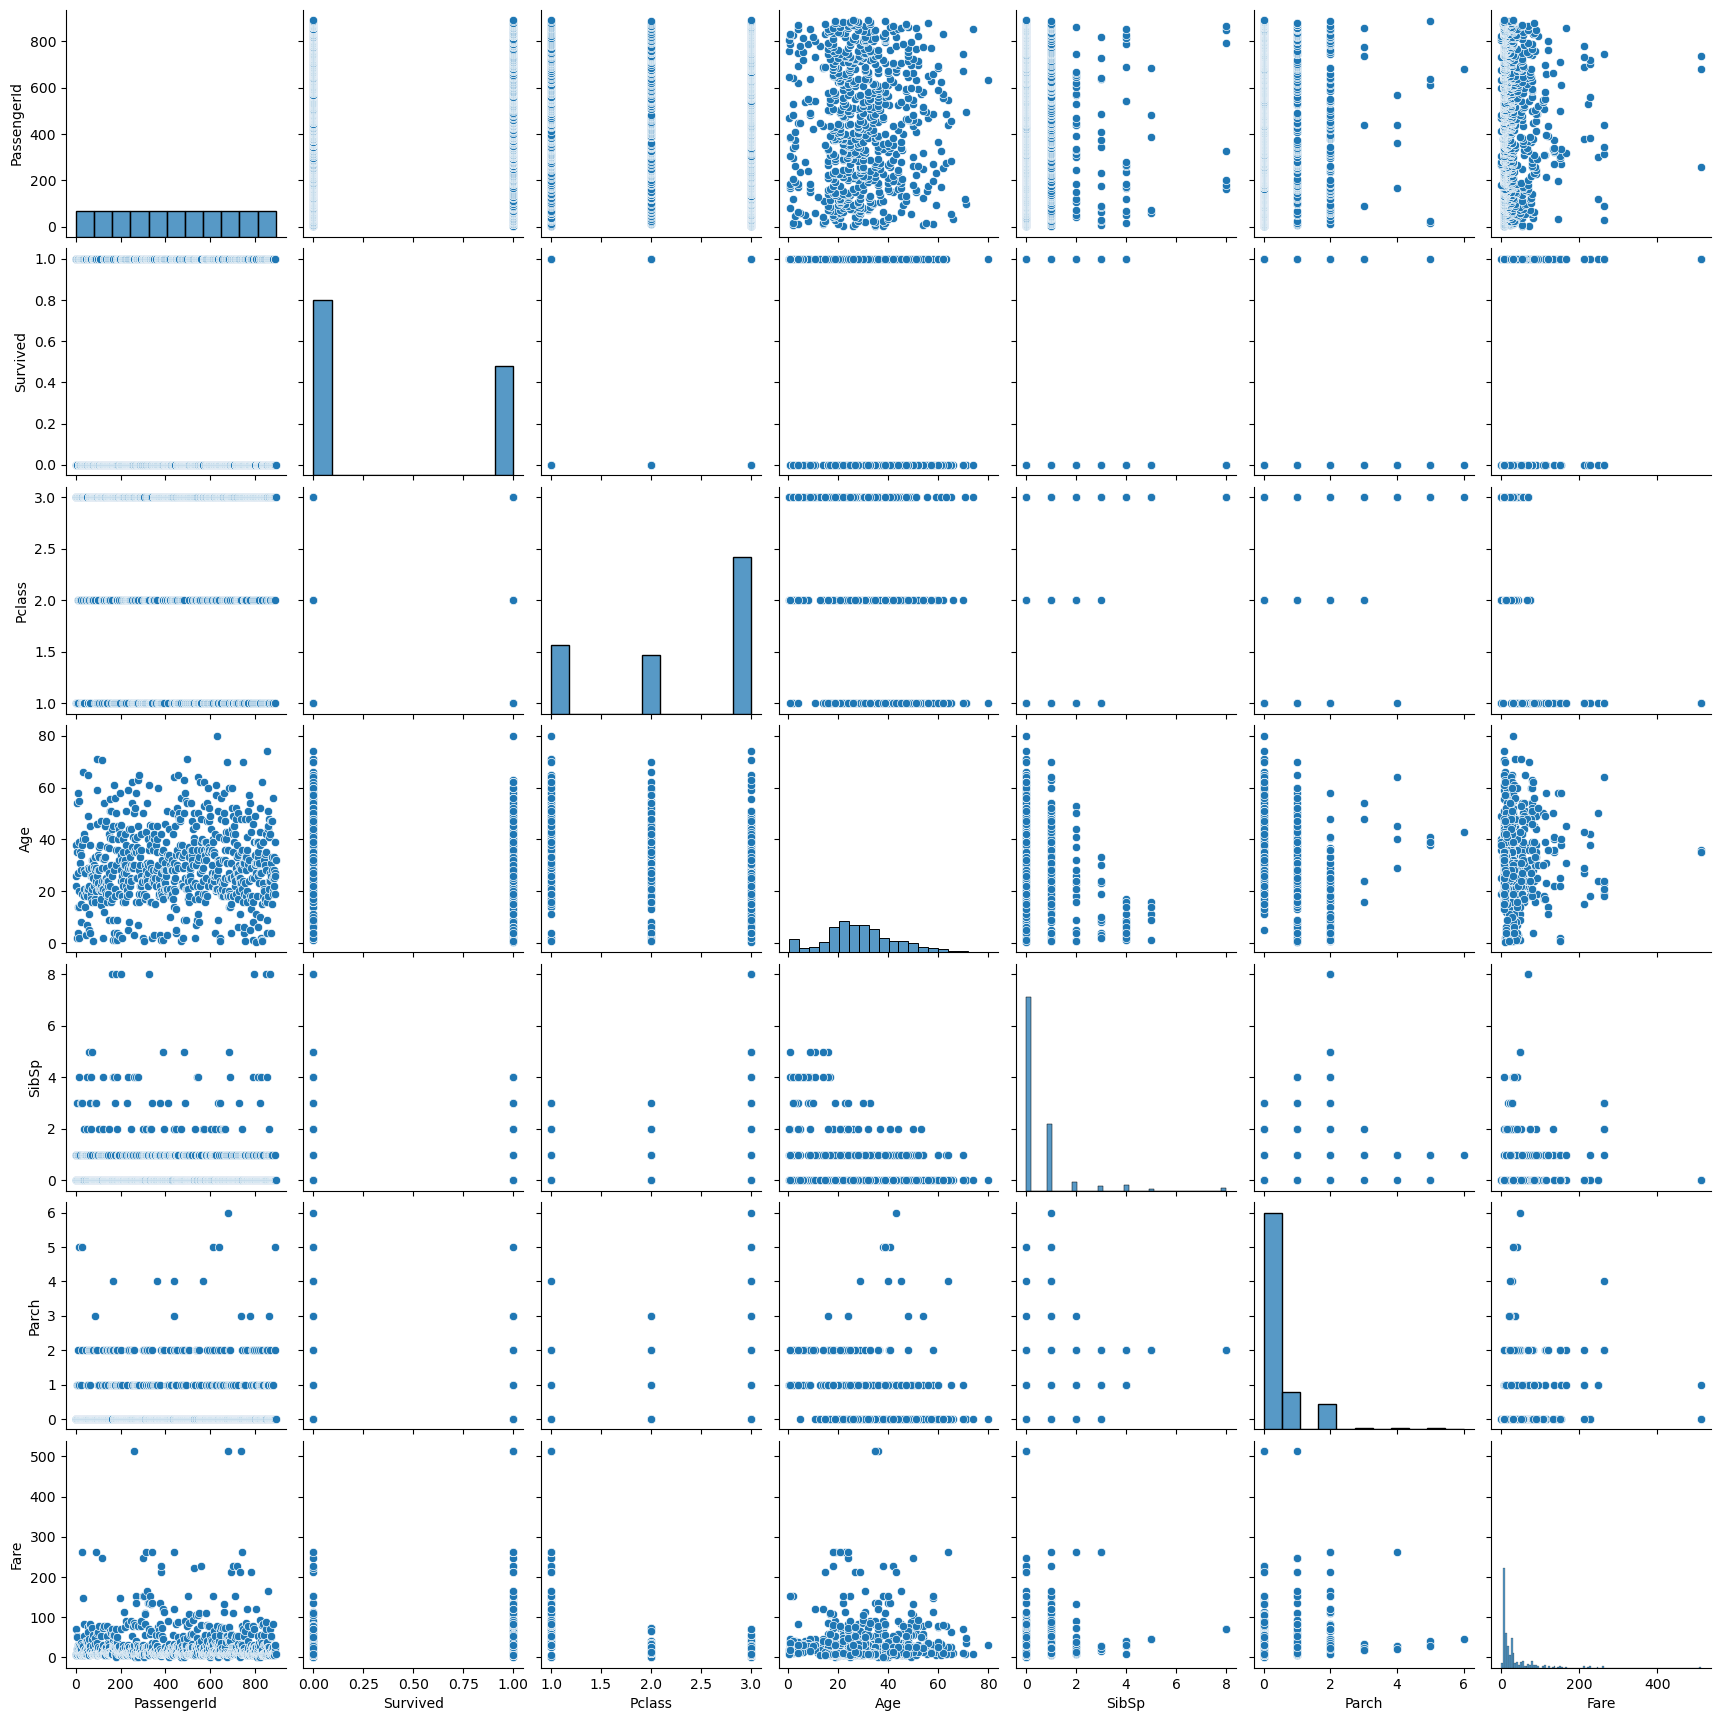

In [5]:
sns.pairplot(data=df)

### Perform pairplot of the dataframe with hue='Survived'

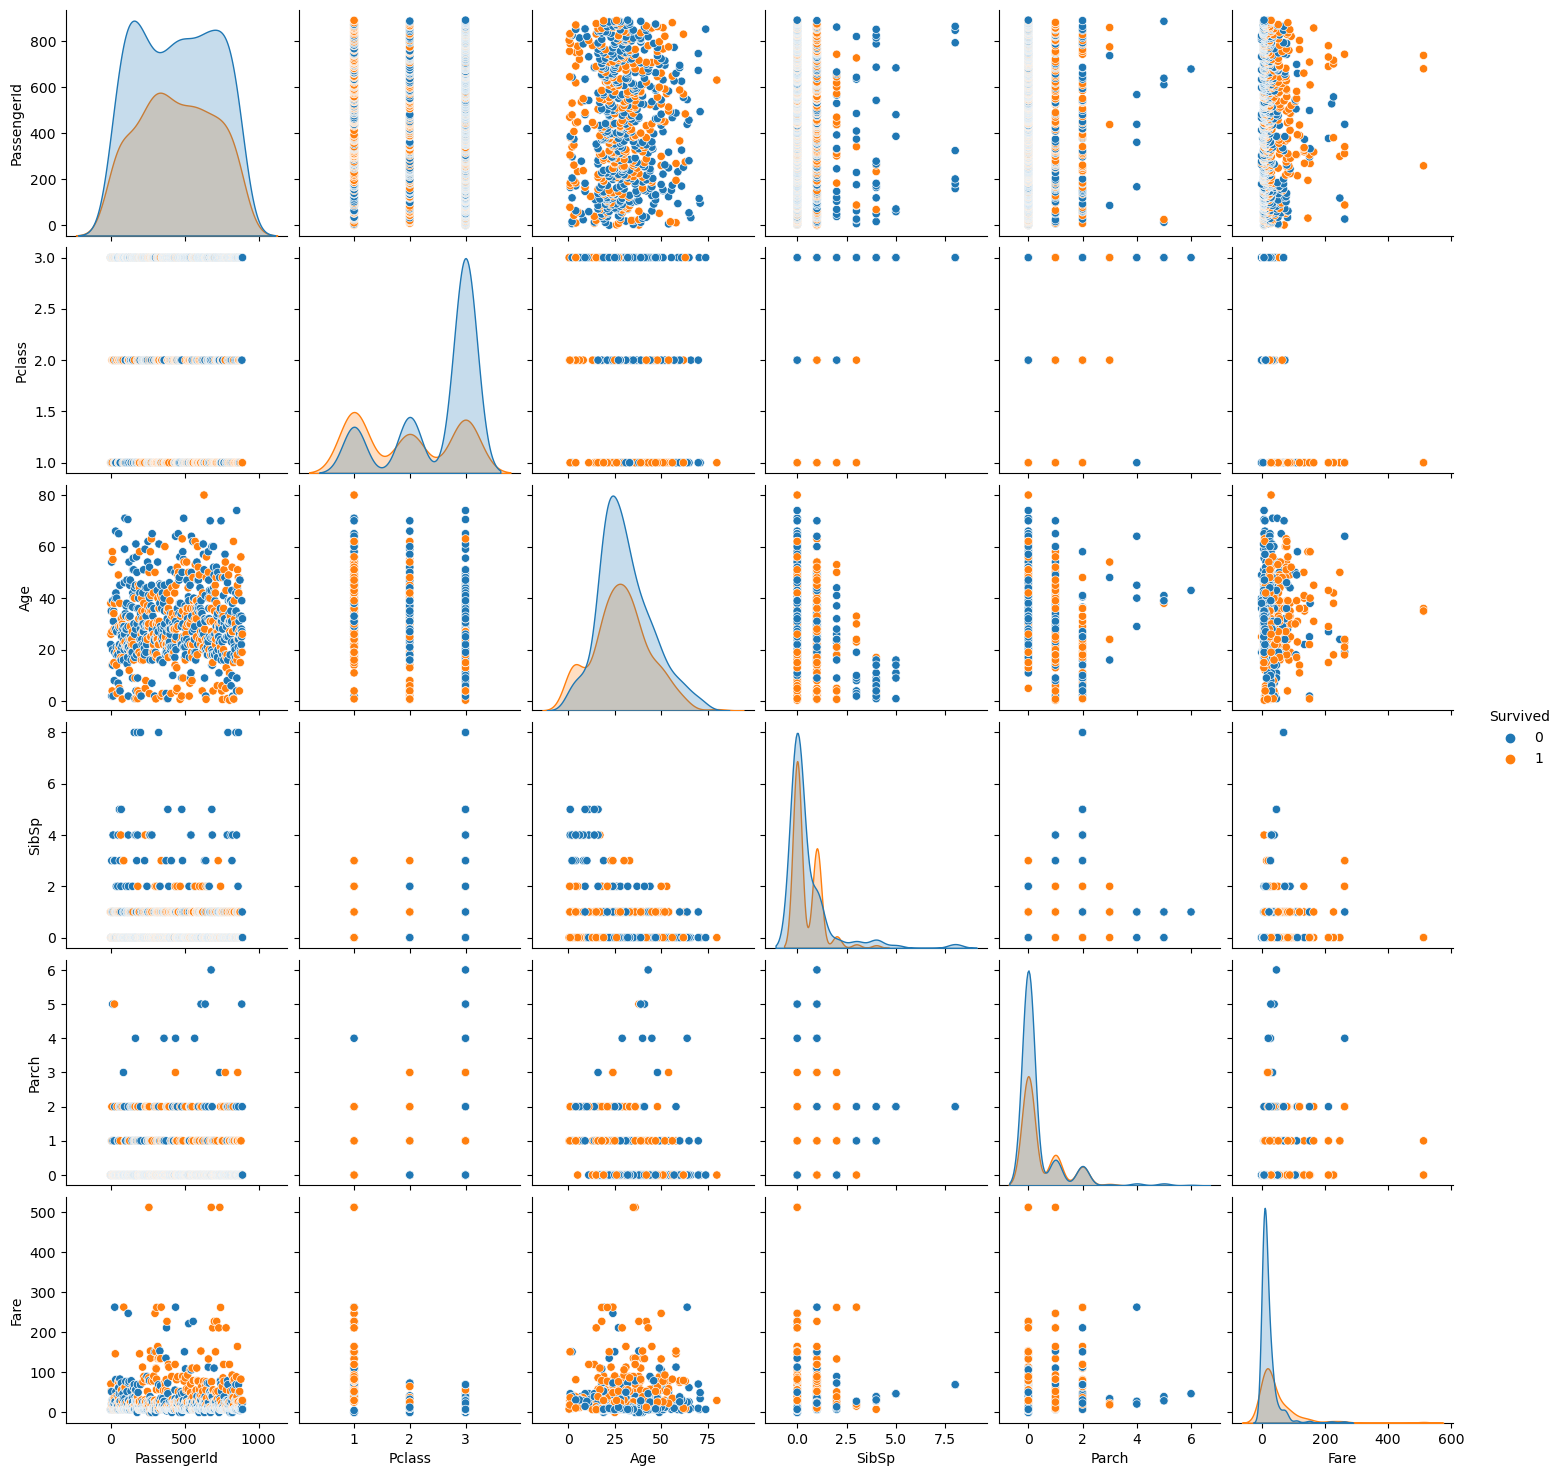

In [6]:
sns.pairplot(data=df, hue='Survived')

### Use pie chart to see the percentage of Survived/Unservived people

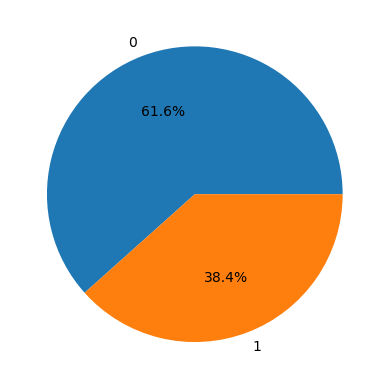

In [7]:
label = df['Survived'].value_counts().index
value = df['Survived'].value_counts().values
plt.pie(x = value, labels = label, autopct="%1.1f%%");

### Use pie chart to see the percentage of Passenger Class (Pclass)

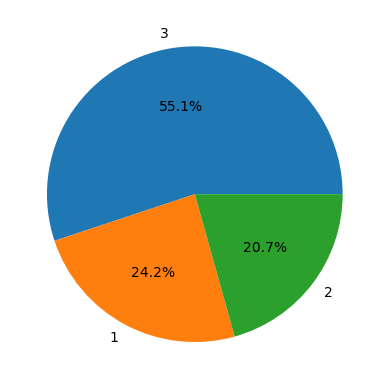

In [8]:
label = df['Pclass'].value_counts().index
value = df['Pclass'].value_counts().values
plt.pie(x = value, labels = label, autopct="%1.1f%%");

### Use count plot to display  how many people survived vs. unservived

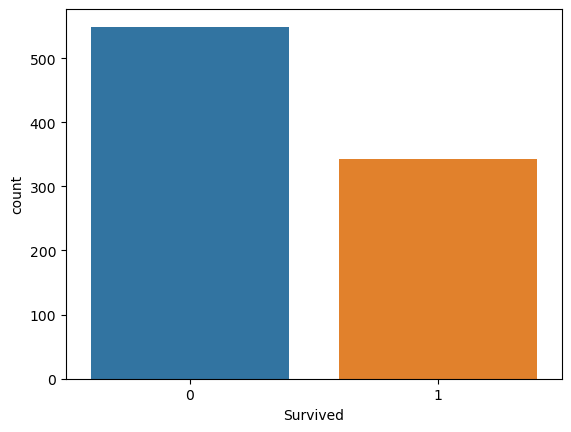

In [9]:
sns.countplot(data=df, x='Survived')
plt.show()


### Use count plot to display  how many people survived vs. unservived categorized by gender (sex)

<Axes: xlabel='Survived', ylabel='count'>

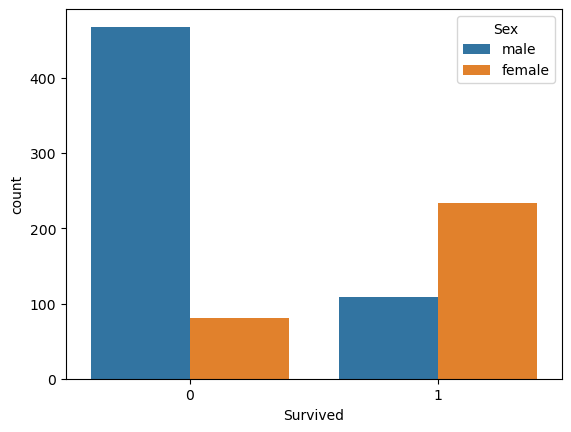

In [10]:
sns.countplot(data=df, x='Survived', hue = 'Sex')

### Use count plot to display  how many people survived vs. unservived categorized by Pclass

<Axes: xlabel='Survived', ylabel='count'>

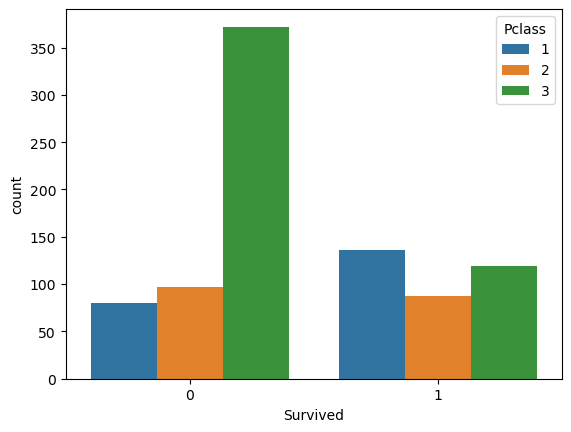

In [11]:
sns.countplot(data=df, x='Survived', hue = 'Pclass')

### Check the distribution of Age

<Axes: xlabel='Age', ylabel='Count'>

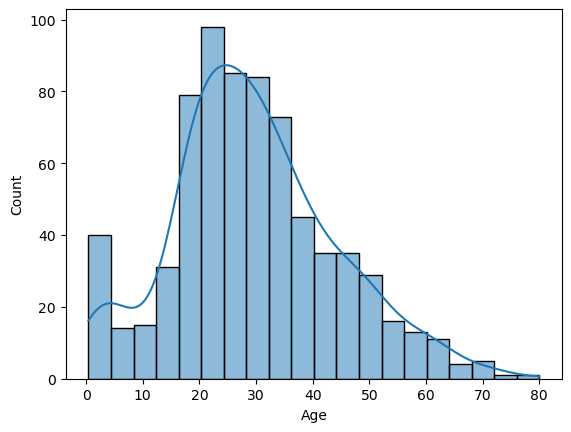

In [12]:
sns.histplot(data=df, x='Age', kde = True)

### Use box plot to display  the distribution of Age for survived/unservived passangers

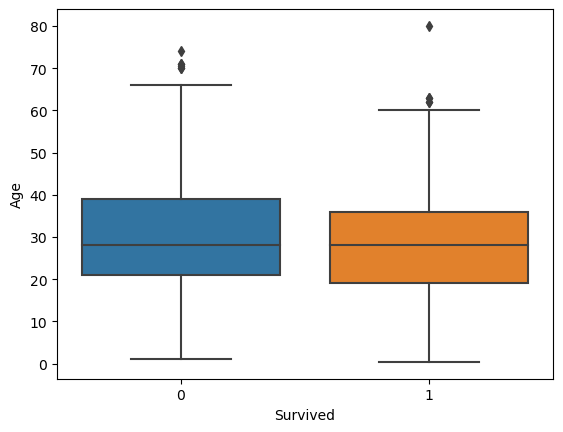

<Axes: xlabel='Pclass', ylabel='Age'>

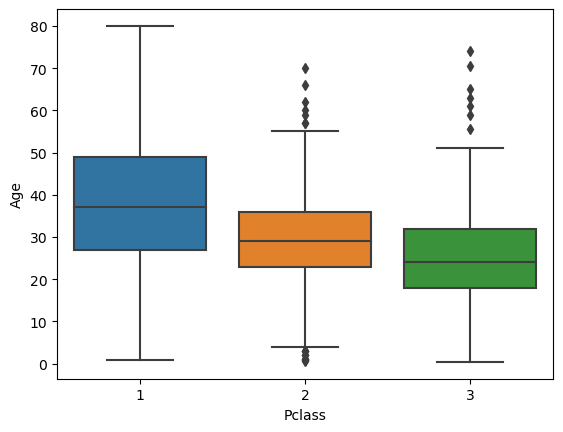

In [13]:
sns.boxplot(data=df, y='Age',x='Survived', orient='v')
plt.show()
sns.boxplot(data=df, y='Age',x='Pclass', orient='v')

### Display the distribution of the ticket fare (Fare)

<Axes: xlabel='Fare', ylabel='Count'>

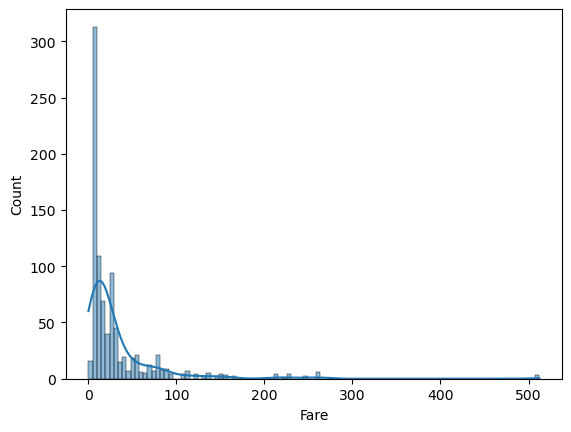

In [14]:
sns.histplot(data=df, x='Fare', kde=True)

### Calculate the mean Fare

In [15]:
mean = df['Fare'].mean()
mean

32.204207968574636

### Calculate the mode Fare

In [16]:
mode = df['Fare'].mode()
mode

0    8.05
Name: Fare, dtype: float64

### Calculate the median Fare

In [17]:
median = df['Fare'].median()
median

14.4542

### Calculate the min,max and quartiles of Fare

In [18]:
min_ = df['Fare'].min()
max_ = df['Fare'].max()
q1   = df['Fare'].quantile(0.25)
q2   = df['Fare'].quantile(0.50)
q3   = df['Fare'].quantile(0.75)
print(min_, max_, q1, q2, q3)

0.0 512.3292 7.9104 14.4542 31.0


### Display the distribution of the ticket fare (Fare) with mean, mode, and median

<Axes: xlabel='Fare', ylabel='Count'>

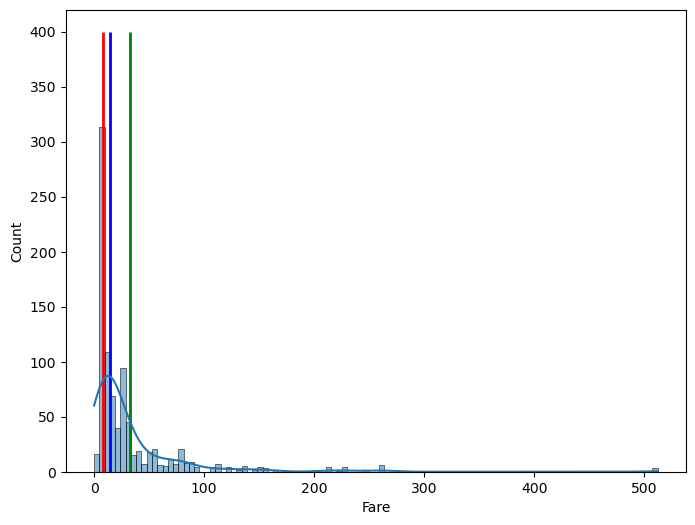

In [19]:
plt.figure(figsize=(8, 6))
plt.vlines(mode, 0, 400, colors='r', lw=2)
plt.vlines(mean, 0, 400, colors='g', lw=2)
plt.vlines(median, 0, 400, colors='b', lw=2)
sns.histplot(data=df, x='Fare', kde=True)

### Display the distribution of the ticket fare (Fare) with histplot and boxplot

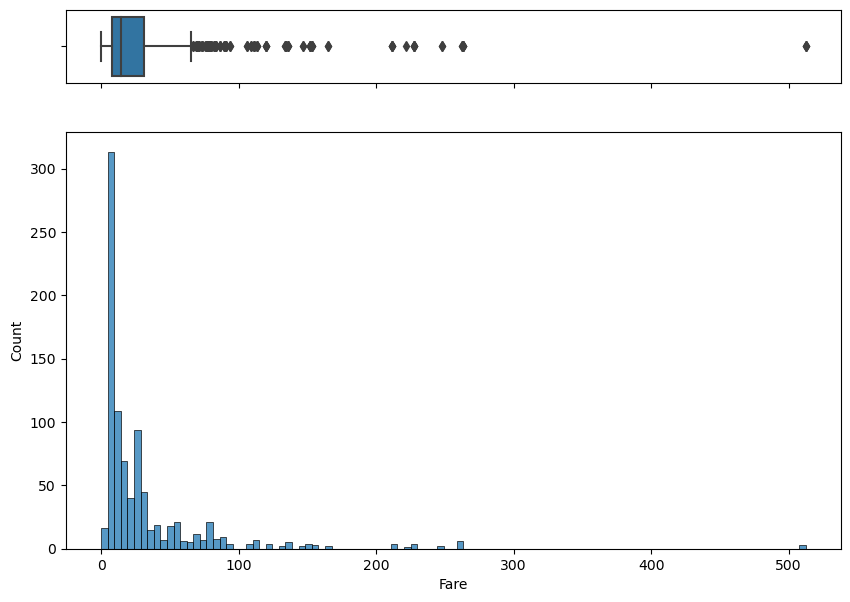

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(10, 7))
 
sns.boxplot(x=df["Fare"], ax=ax_box)
sns.histplot(data=df, x="Fare", ax=ax_hist)
 
ax_box.set(xlabel='')
plt.show()

### Can you tell what kind of skewness of the Fare data?

positive skweed

### Use any technique to convert the skewed data to unskewed data and replot
##### Hint: Drop the rows with 0 fare.

<Axes: xlabel='Fare', ylabel='Count'>

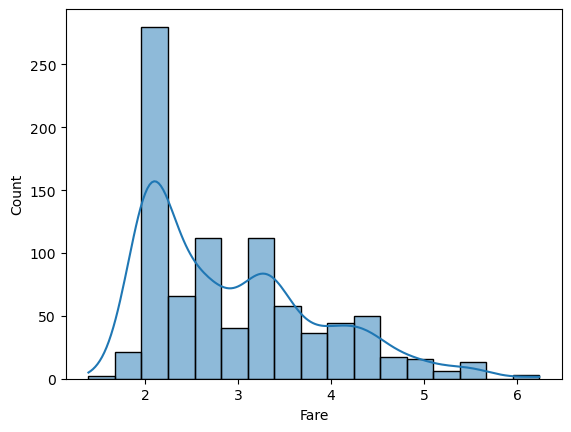

In [21]:
df['Fare'] = df[df['Fare'] != 0]['Fare']
df.dropna(subset=['Fare'], inplace = True)
df['Fare'] = np.log(df['Fare'])
sns.histplot(data=df, x="Fare", kde = True)